In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 统计量及其抽样分布

## 统计量
设(X1,X2,...,Xn)是来自总体的一个样本，g(X1,X2,...,Xn)是样本的函数，若样本函数中不含任何未知参数，则称g(X1,X2,...,Xn)g是一个统计量。

## 中心极限定理

In [2]:
#模拟掷骰子的情况
random_data = np.random.randint(1, 7, 1000000)
print(random_data.mean()) # 打印平均值
print(random_data.std())  # 打印标准差

3.500211
1.7076070846301268


In [3]:
df = pd.DataFrame(random_data)
dfv = df[0].value_counts()

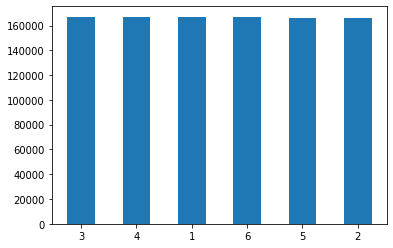

In [4]:
p1 = plt.bar(range(len(dfv)), height=dfv.values, width=0.5,tick_label=dfv.index)
# 展示图形
plt.show()

In [5]:
sample1 = []
size = len(random_data)
for i in range(0, 10):
    sample1.append(random_data[int(np.random.random() * size)])
arr1 = np.asarray(sample1)
print(arr1) # 打印出来
print(arr1.mean()) # 打印平均值
print(arr1.std())  # 打印标准差

[6 3 4 5 1 2 6 5 5 1]
3.8
1.8330302779823362


这个结果和上面的标准差相差比较多，但是如果我有1000组样本数据：

In [6]:
samples = []
samples_mean = []
samples_std = []
for i in range(0, 1000):
    sample = []
    for j in range(0, 50):
        sample.append(random_data[int(np.random.random() * size)])
    sample_np = np.array(sample)
    samples_mean.append(sample_np.mean())
    samples_std.append(sample_np.std())
    samples.append(sample_np)
samples_mean_np = np.array(samples_mean)
samples_std_np = np.array(samples_std)
print(samples_mean_np)
print(samples_std_np)

[3.36 3.38 3.4  3.2  3.24 3.08 3.26 3.34 3.58 3.26 3.52 3.56 3.58 3.5
 3.6  3.54 4.   3.46 3.58 3.56 3.68 3.48 3.58 3.26 3.42 3.54 3.06 3.5
 3.72 3.54 3.84 3.62 3.52 3.84 3.64 3.74 3.06 3.66 3.94 3.36 3.26 3.28
 3.94 3.68 3.34 3.7  3.5  2.84 3.48 3.98 3.4  3.04 3.28 3.32 3.78 3.84
 3.58 3.62 3.3  3.56 3.84 3.56 3.6  3.86 3.58 3.32 3.28 3.66 3.6  3.38
 3.64 3.14 3.3  3.6  3.64 3.42 2.96 3.58 3.02 3.34 3.6  3.18 3.7  3.72
 3.52 3.28 3.68 3.7  3.68 3.78 3.54 3.2  3.38 3.46 3.24 3.96 3.56 3.24
 3.36 3.2  3.36 3.68 3.48 3.4  3.22 3.6  3.76 3.68 2.9  3.48 3.56 3.68
 3.5  3.74 3.7  3.8  3.5  3.26 3.72 3.88 3.6  3.7  3.68 3.6  3.42 3.84
 3.1  4.04 3.48 2.9  3.26 3.2  3.84 3.28 3.52 2.98 3.92 3.56 3.76 3.6
 3.1  3.66 3.92 3.6  3.6  3.6  3.72 3.6  3.56 3.6  3.2  3.26 3.28 3.6
 3.6  3.32 3.34 3.5  3.88 3.84 3.26 3.84 3.28 3.74 3.28 3.74 3.3  3.88
 3.4  3.78 3.6  3.6  3.82 3.74 3.28 3.48 3.62 3.5  3.72 3.12 3.4  3.28
 3.4  3.44 3.24 3.3  3.5  3.16 3.82 3.22 2.94 4.06 3.64 3.46 3.56 3.56
 3.42 3.74

In [7]:
print(samples_mean_np.max())
print(samples_mean_np.min())
bins = np.linspace(2.58,4.26,10)
print(bins)
score_cut = pd.cut(samples_mean_np,bins =  bins.tolist())
score_cut 

4.18
2.84
[2.58       2.76666667 2.95333333 3.14       3.32666667 3.51333333
 3.7        3.88666667 4.07333333 4.26      ]


[(3.327, 3.513], (3.327, 3.513], (3.327, 3.513], (3.14, 3.327], (3.14, 3.327], ..., (3.327, 3.513], (3.513, 3.7], (3.14, 3.327], (3.7, 3.887], (3.513, 3.7]]
Length: 1000
Categories (9, interval[float64]): [(2.58, 2.767] < (2.767, 2.953] < (2.953, 3.14] < (3.14, 3.327] ... (3.513, 3.7] < (3.7, 3.887] < (3.887, 4.073] < (4.073, 4.26]]

In [8]:
df1 = pd.DataFrame(samples_mean_np)
pd.value_counts(score_cut,sort=False)

(2.58, 2.767]       0
(2.767, 2.953]     10
(2.953, 3.14]      57
(3.14, 3.327]     182
(3.327, 3.513]    257
(3.513, 3.7]      314
(3.7, 3.887]      132
(3.887, 4.073]     41
(4.073, 4.26]       7
dtype: int64

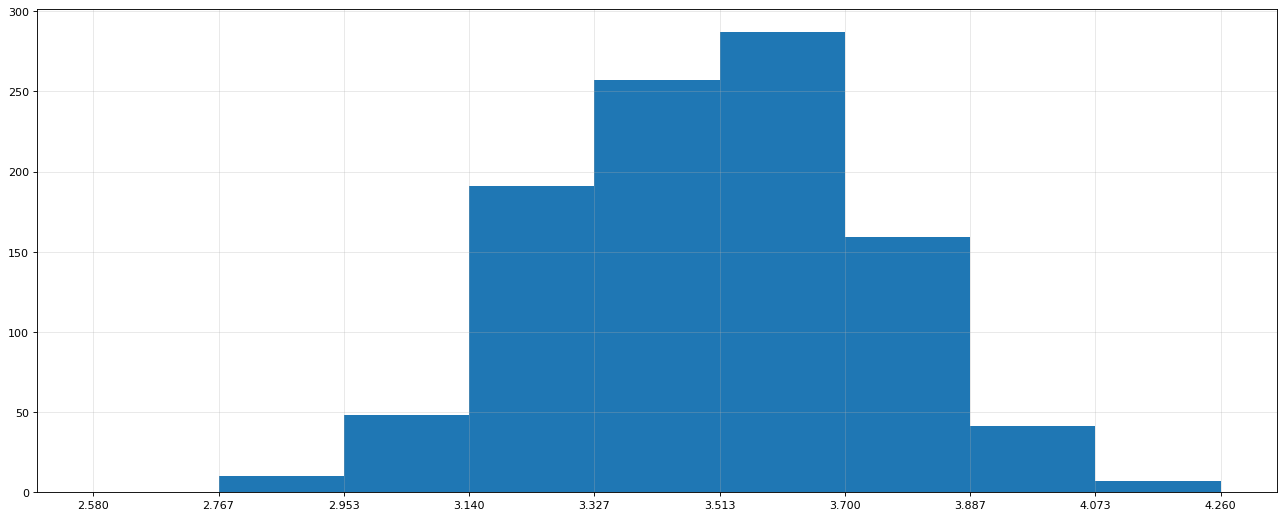

In [9]:
plt.figure(figsize=(20, 8), dpi=80) # 设置图片大小
plt.hist(samples_mean_np, bins,label=score_cut) # 加上normed=True属性之后变为频率分布直方图
# 设置x轴的刻度
plt.xticks(bins)
plt.grid(alpha=0.3)
plt.show()

In [16]:
print("平均值实际值："+str(random_data.mean())) # 打印平均值
print("标准差实际值："+str(random_data.std()))  # 打印标准差
print("中心极限平均值："+str(samples_mean_np.mean())) # 这个值和实际值相差不多
print("中心极限标准差："+str(samples_std_np.mean()))   # 这个值和实际值相差不多

平均值实际值：3.500211
标准差实际值：1.7076070846301268
中心极限平均值：3.49802
中心极限标准差：1.6876021987932037
